**Objectives**

Attempt to answer the following questions from an exploratory analysis of the final data structure:

1. How many seafood items are there per meal?
2. How many side dish items are there per meal?
3. What does the side dish item distribution look like? What is the most common side dish?
4. Are there any problems with the obtained side dish text? Attempt to identify these problems and come up with methods for resolution.
5. What other words are apparent in the seafood description field? Does the seafood description tend to have other side dishes incorporated in the description?
    

In [12]:
import pandas as pd
import nltk
from collections import Counter


df = pd.read_pickle('../../Data/df_final.pkl')


#Obtain only required variables
meal_key = ['SEQN', 'DR1.030Z', 'DR1.020']

#List of side dish columns for isolating side dishes
side_dish_column_list = ['SD1', 'SD2', 'SD3', 'SD4', 'SD5', 'SD6', 'SD7', 'SD8', 
                         'SD9', 'SD10', 'SD11', 'SD12', 'SD13', 'SD14', 'SD15', 
                         'SD16', 'SD17', 'SD18', 'SD19', 'SD20', 'SD21', 'SD22']


#Isolate the side dish subset for analysis
#Obtain the side dish and meal key columns
side_dish_subset = df[meal_key + side_dish_column_list]
#Obtain count of side dish item in each column. This can be used as a statistic to describe
#the number of side dishes per meal.
side_dish_count = side_dish_subset.count()
#Melt the df on meal
sd_melted = pd.melt(side_dish_subset, id_vars=meal_key)
#Remove rows that are NaN
side_dish_subset = sd_melted[sd_melted['value'].notna()]
#Obtain and plot frequency distribution of the side dish words
side_dish_fdist = nltk.FreqDist(side_dish_subset['value'])


#List of side dish columns for isolating seafood items
sf_column_list = ['SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7']
#Isolate the seafood subset for analysis
#Obtain the seafood item and meal key columns
side_dish_subset = df[meal_key + sf_column_list]
#Obtain the seafood item count in each column. Result can be used as a statistic to count
#the number of seafood species per meal
meal_sf_count = side_dish_subset.count()



#List of seafood item description columns for isolating seafood item descriptions
sf_desc_column_list = ['SFD1', 'SFD2', 'SFD3', 'SFD4', 'SFD5', 'SFD6', 'SFD7', 'SFD8', 'SFD9']
sf_desc_subset = df[meal_key + sf_desc_column_list]


sf_desc_melted = pd.melt(sf_desc_subset, id_vars=meal_key)
sf_desc_subset = sf_desc_melted[sf_desc_melted['value'].notna()]

    
#Obtain the seafood item counts per meal as a percentage of seafood meals
meal_sf_count = meal_sf_count.apply(pd.Series)
meal_sf_count = meal_sf_count.rename({0: 'Count'}, axis=1)
#meal_sf_count.reset_index(level=0, inplace=True)
meal_sf_count["pct"] = (meal_sf_count["Count"] / meal_sf_count.iloc[0][0]) * 100
meal_sf_count['SF_Num'] = meal_sf_count.index


#Obtain the side dish item counts per meal as a percentage of seafood meals
side_dish_count = side_dish_count.apply(pd.Series)
side_dish_count = side_dish_count.rename({0: 'Count'}, axis=1)
#side_dish_count.reset_index(level=0, inplace=True)
side_dish_count["pct"] = (side_dish_count["Count"] / side_dish_count.iloc[0][0]) * 100
side_dish_count['SD_Num'] = side_dish_count.index


**Part 1**

How many seafood items are there per meal?

This is statistic is important for the project objectives, since the aim is to associate each type of seafood with a side dish. However, there are meals where more than one seafood type is present. For these scenarios, a decision needs to be made on how to address the association. For example, if a meal contains 3 seafood types, do all side dishes for that meal get associated with all those seafood types (side dishes x3)? 

     Count         pct SF_Num
SF1   8585  100.000000    SF1
SF2    723    8.421666    SF2
SF3    143    1.665696    SF3
SF4     43    0.500874    SF4
SF5      7    0.081538    SF5
SF6      3    0.034945    SF6
SF7      1    0.011648    SF7


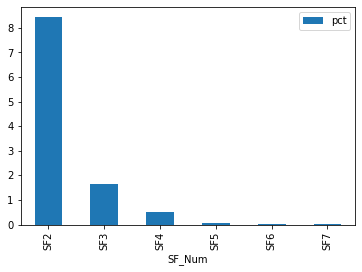

In [21]:
print(meal_sf_count[3:])
meal_sf_count[4:].plot.bar(x='SF_Num', y='pct', rot=90)

The data analysis shows that there are up to 7 seafood items per seafood meal. The table above displays the meal counts for each number of seafood dishes. The graph above shows the percetange of meals that contain more than one seafood dish. So for example, about 8.42% of seafood meals contain 2 seafood dishes, 1.66% of seafood meals contain 3 seafood dishes, and so on. 

**Part 2**

How many side dish items are there per meal?

This part aims to provide some insight into the number of side dishes per seafood meal, and their distribution. The analysis is similar to part 1, but for side dish items instead of seafood items.

      Count        pct SD_Num
SD1    8237  95.946418    SD1
SD2    7268  84.659289    SD2
SD3    5788  67.419918    SD3
SD4    4210  49.039022    SD4
SD5    2925  34.071054    SD5
SD6    2027  23.610949    SD6
SD7    1308  15.235877    SD7
SD8     867  10.099010    SD8
SD9     576   6.709377    SD9
SD10    387   4.507863   SD10
SD11    249   2.900408   SD11
SD12    162   1.887012   SD12
SD13    104   1.211415   SD13
SD14     67   0.780431   SD14
SD15     40   0.465929   SD15
SD16     24   0.279557   SD16
SD17     16   0.186372   SD17
SD18     13   0.151427   SD18
SD19      8   0.093186   SD19
SD20      7   0.081538   SD20
SD21      2   0.023296   SD21
SD22      1   0.011648   SD22


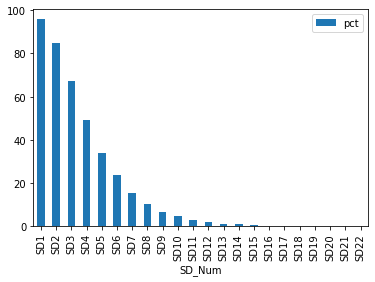

In [22]:
print(side_dish_count[3:])
side_dish_count[3:].plot.bar(x='SD_Num', y='pct', rot=90)

The analysis shows that there are up to 22 side dishes for a seafood meal. The table above shows the seafood meal count for each side dish number. The bar plot is displaying side dish count as a percentage of the total seafood meals. We can see that not all seafood meals contain a side dish (about 4%, since 96% contain at least one). 

**Part 3**

What does the side dish item distribution look like? What is the most common side dish?

This analysis gives a similar result from the previous week's, but uses the final data sctructure instead of the word corpus extraction method.

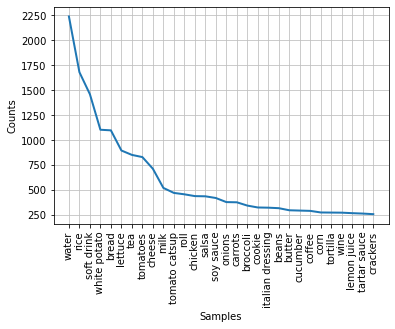

In [28]:
side_dish_fdist.plot(30)

The plot above is showing the distribution of the word counts found from the extraction of side dish items. Water seems to be the most consumed item in a seafood meal, but it is a non-caloric item and can be eliminated from the final analyses. Water aside, rice is the most consumed side dish for seafood meals.

**Part 4**

Are there any problems with the obtained side dish text? Attempt to identify these problems and come up with methods for resolution.

In [42]:
item = []
item_count = []
for k,v in side_dish_fdist.items():
    item.append(k)
    item_count.append(v)

table1 = pd.DataFrame(item_count, item, columns=['Count'])  
print(table1.sort_values('Count', ascending=False))

                                               Count
water                                           2237
rice                                            1679
soft drink                                      1458
white potato                                    1102
bread                                           1096
...                                              ...
millet                                             1
pan dulce                                          1
cookie-crisp                                       1
champagne punch                                    1
chicken or turkey vegetable soup with noodles      1

[1270 rows x 1 columns]


From the table of the uniqe word counts that are extracted from the side item descriptions, we can see that there are 1270 unique words. This number must be reduced in order to accomodate an multiclass prediction model for predicting a side dish given seafood. More work needs to be done in collaboration with the client in order to reduce this to a more manageable number of categories.

**Part 5**

What other words are apparent in the seafood description field? Does the seafood description tend to have other side dishes incorporated in the description?

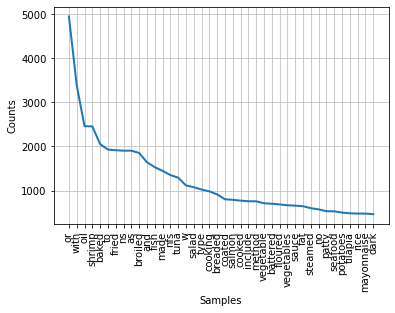

In [15]:
#Build tokenizer for finding unique words
tokenizer = nltk.RegexpTokenizer(r"\w+")

#Obtain a list of all the words in the seafood item descriptions
new_words = []
for index, row in sf_desc_subset.iterrows():
    new_words_temp = tokenizer.tokenize(sf_desc_subset['value'][index])
    for i in new_words_temp:
        new_words.append(i)
        
#Obtain word count and arrange by descending order
sf_desc_wrd_counts = nltk.FreqDist(new_words)
sf_desc_wrd_counts.plot(40)

The plot above is describing the distribution of unique words derived from the description field of the seafood items themselves. From this initial plot, we can see that there words indicating information about sides in the seafood item itself. This information can potentially be extracted to complete the full scope of the side dishes. Otherwise, this information is lost due to the seafood item already labeled as seafood only. For example, the words "vegetable", "vegetables", "rice", "potatoes" are apparent in significant numbers in the seafood item description field. 

**Conclusions**

